In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_models import *

/net/dali/home/mscbio/aar126/.conda/envs/dehaze/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /net/dali/home/mscbio/aar126/.conda/envs/dehaze/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


In [2]:
_, models_avail = getHelp()

Models available: 
 LightDehazeNet 
 LightDehazeNet_KL 
 LighDehazeNet_GL 
 LightDehazeNet_MI 
 LightDehaze_Net_Attn, LightDehazeNet_Attn_Conv, LightDehazeNet_Attn_Conv_Big


In [3]:
models_avail

['LightDehazeNet',
 'LightDehazeNet_KL',
 'LighDehazeNet_GL',
 'LightDehazeNet_MI',
 'LightDehazeNet_Attn',
 'LightDehazeNet_Attn_Conv',
 'LightDehazeNet_Attn_Conv_Big']

In [4]:

# current folder
cur_folder = 'src'

# storing paths as string
main_dir = str(os.getcwd()[:-len(cur_folder)])

weight_dir = main_dir + 'weights/'
dirs = {models_avail[0] : weight_dir + str.lower(models_avail[0]) + '/' + str.lower(models_avail[0]), 
        models_avail[1] : weight_dir + str.lower(models_avail[0]) + '_KL/' + str.lower(models_avail[0]) + '_KL',
       models_avail[2] : weight_dir + str.lower(models_avail[0]) + '_GL/' + str.lower(models_avail[0]) + '_GL',
        models_avail[3] : weight_dir + str.lower(models_avail[0]) + '_MI/',
       models_avail[4] : weight_dir + str.lower(models_avail[4]) + '/' + str.lower(models_avail[4]), 
        models_avail[5] : weight_dir + str.lower(models_avail[5]) + '/' + str.lower(models_avail[5]),
       models_avail[6] : weight_dir + str.lower(models_avail[6]) + '/' + str.lower(models_avail[6])}

In [5]:
files = ['per_epoch_train.csv', 'per_epoch_val.csv', 'train_loss_all.csv', 'val_loss_all.csv']

In [ ]:
mdl_losses = {x : [] for x in models_avail}

losses = pd.DataFrame()

for m in list(dirs.keys()):
    mdl_losses[m] = {'train': pd.read_csv(dirs[m] + files[0]), 'val':pd.read_csv(dirs[m] + files[1])}
    losses = losses.append(mdl_losses[m], ignore_index = True)

In [ ]:
# figure 1: training loss vs validation loss at each epoch

# for i, k in enumerate(dirs):
# not ready yet
for x in range(len(list(mdl_losses.keys()))):
    plt.figure()
    plt.plot(losses['train'][x]['0'], label = "train")
    plt.plot(losses['val'][x]['0'], label = "val")
    plt.legend()
    plt.show()

In [7]:
# img comparison
losses

,train,val
0,Unnamed: 0 0 0 0 0.022...,Unnamed: 0 0 0 0 0.022...
1,Unnamed: 0 0 0 0 12.8...,Unnamed: 0 0 0 0 10.8...
2,Unnamed: 0 0 0 0 0.010...,Unnamed: 0 0 0 0 0.009...
3,Unnamed: 0 0 0 0 NaN 1 ...,Unnamed: 0 0 0 0 -0.000...
4,Unnamed: 0 0 0 0 0.022...,Unnamed: 0 0 0 0 0.019...
5,Unnamed: 0 0 0 0 0.076...,Unnamed: 0 0 0 0 0.020...
6,Unnamed: 0 0 0 0 0.021...,Unnamed: 0 0 0 0 0.019...


In [7]:
# load training/validation data
img_dirs = {'hazy' : main_dir + 'reside/hazy/', 'clear' : main_dir + 'reside/clear/'}
train_data, validation_data, test_data = preparing_training_data(img_dirs['clear'], img_dirs['hazy'])

In [8]:
weight_dirs_pth = {models_avail[0] : weight_dir + str.lower(models_avail[0]) + '/39_', 
        models_avail[1] : weight_dir + str.lower(models_avail[0]) + '_KL/39_',
       models_avail[2] : weight_dir + str.lower(models_avail[0]) + '_GL/39_',
        models_avail[3] : weight_dir + str.lower(models_avail[0]) + '_MI/39_',
       models_avail[4] : weight_dir + str.lower(models_avail[4]) + '/39_', 
        models_avail[5] : weight_dir + str.lower(models_avail[5]) + '/39_',
       models_avail[6] : weight_dir + str.lower(models_avail[6]) + '/39_'}

mdls = {'lhd' : LightDehazeNet(weight_dirs_pth[list(dirs.keys())[0]]), 
        'KL' : LightDehazeNet_KL(weight_dirs_pth[list(dirs.keys())[1]]), 
        'GL' : LightDehazeNet_GL(weight_dirs_pth[list(dirs.keys())[2]]),
        'MI' : LightDehazeNet_MI(weight_dirs_pth[list(dirs.keys())[3]]),
        'attn': LightDehazeNet_Attn(weight_dirs_pth[list(dirs.keys())[4]]),
        'attn_conv': LightDehazeNet_Attn_Conv(weight_dirs_pth[list(dirs.keys())[5]]),
        'attn_conv_big': LightDehazeNet_Attn_Conv_Big(weight_dirs_pth[list(dirs.keys())[6]])}



In [9]:
# iterate through test data
psnr_dict = {x : [] for x in list(mdls.keys())}

for i, [clear, hazy] in enumerate(test_data):
    
    hazy_image = np.array(Image.open(hazy))
    clear_image = np.array(Image.open(clear))
    
    for m in list(psnr_dict.keys()):
        
        dehazed = (mdls[m].image_haze_removel(hazy_image))[0, :, : :].permute(1, 2, 0)
        psnr_dict[m].append(compute_psnr(dehazed.cpu().data.numpy(), clear_image))
#         psnr_dict[m].append(compute_psnr(hazy_image, clear_image))


/net/dali/home/mscbio/aar126/.conda/envs/dehaze/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1670027390539/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
psnr_df = pd.DataFrame.from_dict(psnr_dict, orient="index")
psnr_df.to_csv('psnr_df.csv')

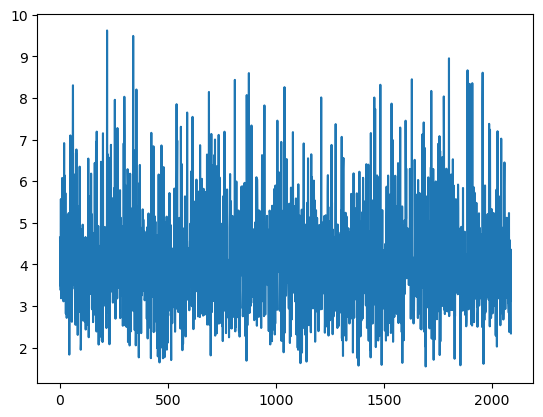

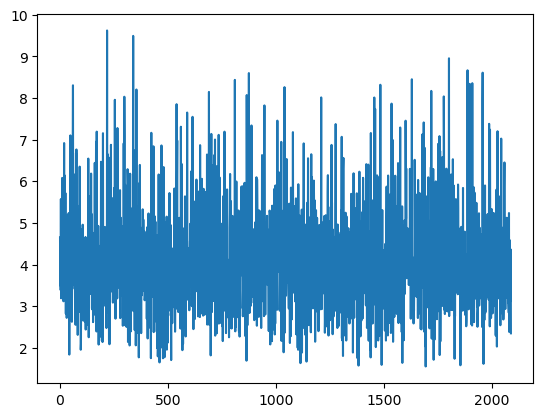

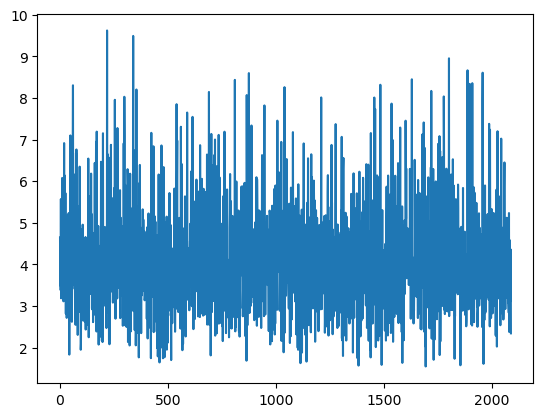

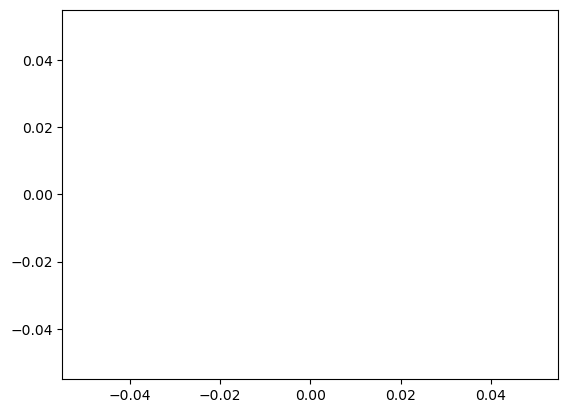

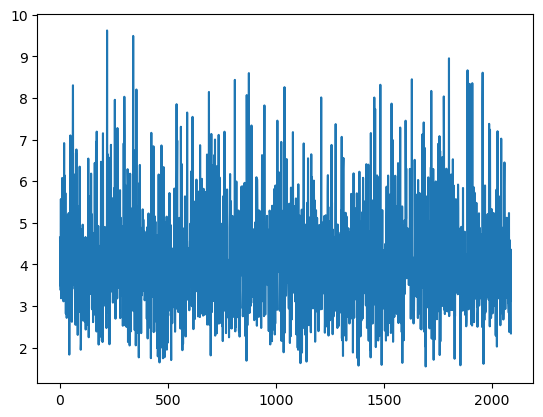

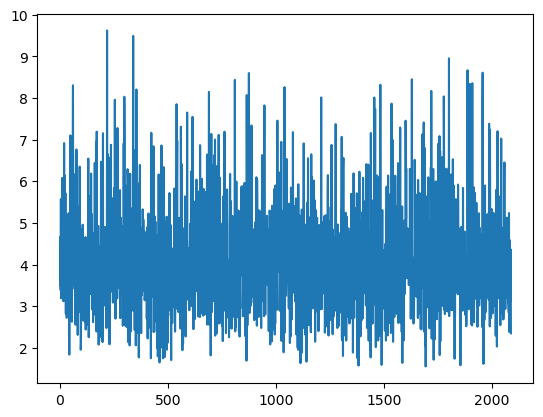

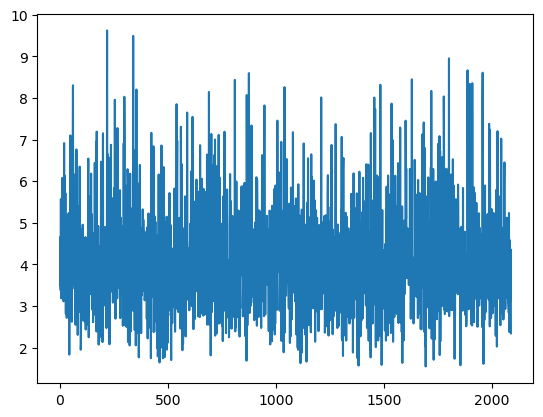

In [11]:
# go through training data for each model:
for m in list(psnr_dict.keys()):
    plt.figure()
    plt.plot(pd.Series(psnr_dict[m]), label = m)


In [ ]:
for x in range(len(list(mdl_losses.keys()))):
    plt.figure()
    plt.plot(losses['train'][x]['0'], label = "train")
    plt.plot(losses['val'][x]['0'], label = "val")
    plt.legend()
    plt.show()

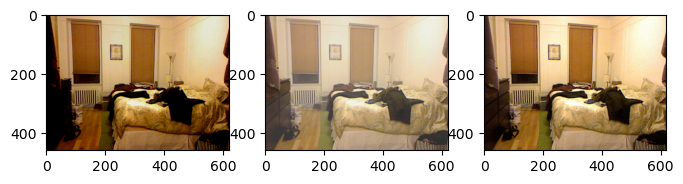

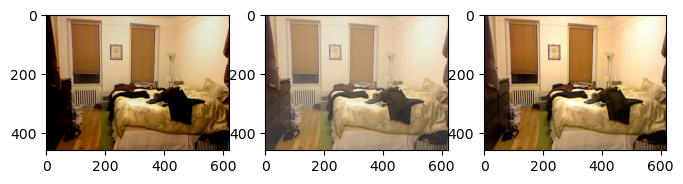

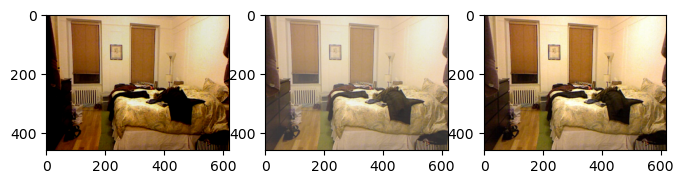

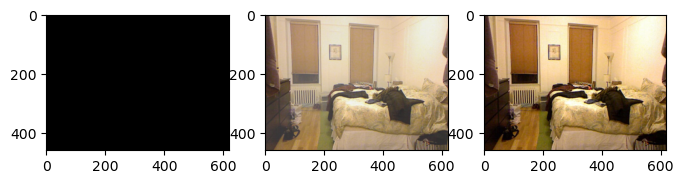

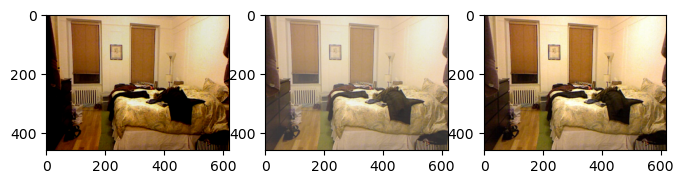

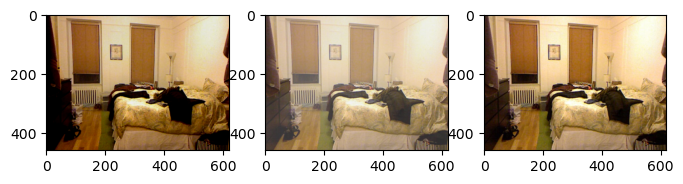

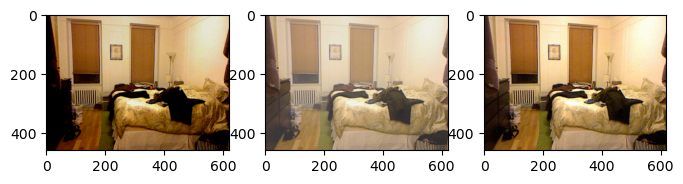

In [23]:
hazy_image = np.array(Image.open(test_data[2][1]))
clear_image = np.array(Image.open(test_data[2][0]))

for m in list(psnr_dict.keys()):
    fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (8, 8))
    dehazed = (mdls[m].image_haze_removel(hazy_image))[0, :, : :].permute(1, 2, 0)
    ax0.imshow(dehazed.cpu().data.numpy())
    ax1.imshow(hazy_image)
    ax2.imshow(clear_image)

In [17]:
test_data[1]

['/net/dali/home/mscbio/aar126/dehaze/reside/clear/328.png',
 '/net/dali/home/mscbio/aar126/dehaze/reside/hazy/328_5_0.96914.png']